In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
data=pd.read_csv('GOOG.csv',date_parser=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-08-19,583.398254,585.731873,582.401001,585.253174,585.253174,978600
1,2014-08-20,584.275879,585.093628,580.974915,582.889648,582.889648,1036700
2,2014-08-21,582.221497,582.899658,579.548828,581.772766,581.772766,914800
3,2014-08-22,581.992126,583.633606,579.050232,580.964966,580.964966,789000
4,2014-08-25,583.119019,583.398254,577.414734,578.611450,578.611450,1361400


In [3]:
data_training= data[data['Date']<'2019-01-01'].copy()
data_test=data[data['Date']>='2019-01-01'].copy()

In [4]:
print(data.shape)
print(data_training.shape)
print(data_test.shape)

(1291, 7)
(1100, 7)
(191, 7)


In [5]:
training_data= data_training.drop(['Date','Adj Close'], axis=1)

In [6]:
training_data.head()

,Open,High,Low,Close,Volume
0,583.398254,585.731873,582.401001,585.253174,978600
1,584.275879,585.093628,580.974915,582.889648,1036700
2,582.221497,582.899658,579.548828,581.772766,914800
3,581.992126,583.633606,579.050232,580.964966,789000
4,583.119019,583.398254,577.414734,578.611450,1361400


In [7]:
scaler= MinMaxScaler()
training_data= scaler.fit_transform(training_data)
training_data

array([[0.11585714, 0.11692177, 0.1260836 , 0.12102471, 0.04243398],
       [0.11698562, 0.11610274, 0.12421405, 0.11798335, 0.04789569],
       [0.11434402, 0.11328733, 0.12234449, 0.11654616, 0.03643645],
       ...,
       [0.67359064, 0.70485274, 0.66960974, 0.7111804 , 0.14877276],
       [0.71534169, 0.71982831, 0.71693567, 0.70243018, 0.08343909],
       [0.71706467, 0.71615808, 0.70446843, 0.70053864, 0.0908185 ]])

In [8]:
X_train=[]
y_train=[]

for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i,0])

In [9]:
X_train, y_train= np.array(X_train),np.array(y_train)

In [10]:
X_train.shape, y_train.shape

((1040, 60, 5), (1040,))

In [11]:
## Building RNN-LSTM- Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

: 

In [13]:
X_train.shape[1]

60

In [14]:
regressior=Sequential()

regressior.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units=60,activation='relu',return_sequences=True))
regressior.add(Dropout(0.3))

regressior.add(LSTM(units=80,activation='relu',return_sequences=True))
regressior.add(Dropout(0.4))

regressior.add(LSTM(units=120,activation='relu',return_sequences=True))
regressior.add(Dropout(0.5))

regressior.add(Dense(units=1))


In [15]:
regressior.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 120)           9

In [16]:
regressior.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
regressior.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
33/33 [==============================] - 13s 166ms/step - loss: 0.1519
Epoch 2/10
33/33 [==============================] - 5s 162ms/step - loss: 0.0405
Epoch 3/10
33/33 [==============================] - 5s 165ms/step - loss: 0.0278
Epoch 4/10
33/33 [==============================] - 5s 163ms/step - loss: 0.0214
Epoch 5/10
33/33 [==============================] - 5s 162ms/step - loss: 0.0186
Epoch 6/10
33/33 [==============================] - 5s 163ms/step - loss: 0.0167
Epoch 7/10
33/33 [==============================] - 5s 164ms/step - loss: 0.0144 1s -
Epoch 8/10
33/33 [==============================] - 5s 161ms/step - loss: 0.0123
Epoch 9/10
33/33 [==============================] - 5s 164ms/step - loss: 0.0120
Epoch 10/10
33/33 [==============================] - 6s 179ms/step - loss: 0.0109


In [18]:
# Prepare test dataset

In [19]:
past_60_days = data_training.tail(60)

df= past_60_days.append(data_test,ignore_index=True)
df= df.drop(['Date', 'Adj Close'],axis=1)
df.shape

(251, 5)

In [20]:
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [21]:
inputs= scaler.transform(df)
inputs

array([[0.90270076, 0.90198544, 0.87749792, 0.87114099, 0.15814509],
       [0.86691601, 0.87117462, 0.86379036, 0.85719225, 0.06177087],
       [0.8445553 , 0.86411675, 0.84051283, 0.84640895, 0.13209622],
       ...,
       [0.93313654, 0.94525655, 0.94042952, 0.91863639, 0.07015614],
       [0.90482242, 0.90130528, 0.89809846, 0.88200157, 0.10226835],
       [0.88298895, 0.89114205, 0.8864833 , 0.89641353, 0.10284178]])

In [22]:
X_test=[]
y_test=[]

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

In [23]:
X_test,y_test=np.array(X_test),np.array(y_test)

In [24]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],5))
X_test.shape

(191, 60, 5)

In [25]:
X_test.shape, y_test.shape

((191, 60, 5), (191,))

In [26]:
y_pred= regressior.predict(X_test)
y_pred

array([[[0.32291085],
        [0.6539145 ],
        [0.8089926 ],
        ...,
        [0.63545656],
        [0.6318088 ],
        [0.63032025]],

       [[0.31889445],
        [0.64316434],
        [0.80214304],
        ...,
        [0.6318137 ],
        [0.6303243 ],
        [0.6308418 ]],

       [[0.31563184],
        [0.6371827 ],
        [0.78382236],
        ...,
        [0.63032955],
        [0.63084614],
        [0.6326288 ]],

       ...,

       [[0.30890507],
        [0.61943716],
        [0.78892237],
        ...,
        [0.7793391 ],
        [0.77965057],
        [0.77972895]],

       [[0.30871335],
        [0.62508875],
        [0.7973261 ],
        ...,
        [0.7796528 ],
        [0.7797308 ],
        [0.7794941 ]],

       [[0.3129373 ],
        [0.63409334],
        [0.80250674],
        ...,
        [0.779733  ],
        [0.779496  ],
        [0.77843314]]], dtype=float32)

In [27]:
scaler.scale_

array([1.28583568e-03, 1.28324897e-03, 1.31096830e-03, 1.28678841e-03,
       9.40052831e-08])

In [28]:
scale=1/1.28583568e-03
scale

777.7043486614091

In [29]:
y_pred=y_pred*scale
y_test=y_test*scale

ValueError: x and y can be no greater than 2-D, but have shapes (191,) and (191, 60, 1)

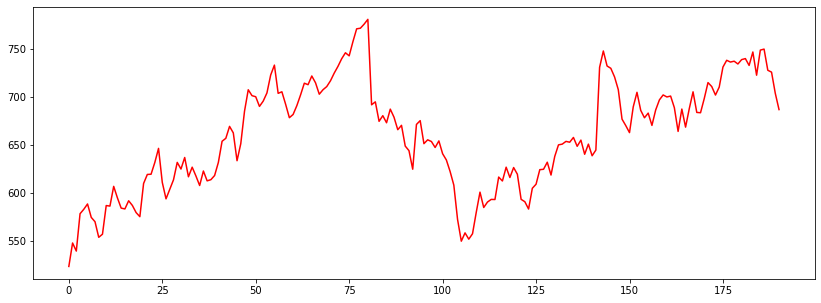

In [42]:
# Visualization 

plt.figure(figsize=(14,5))
plt.plot(y_test, color='red',label='Real Google Stock Price')
plt.plot(y_pred, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()